# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [74]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Импорт библиотек и модулей

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

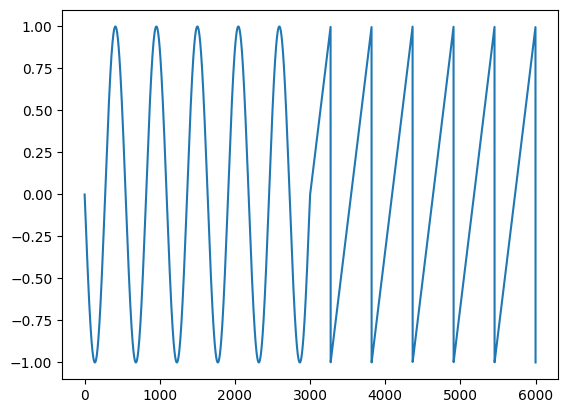

In [76]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [77]:
#Поиск сниппетов
snp = snippets(ts, 600, 2)

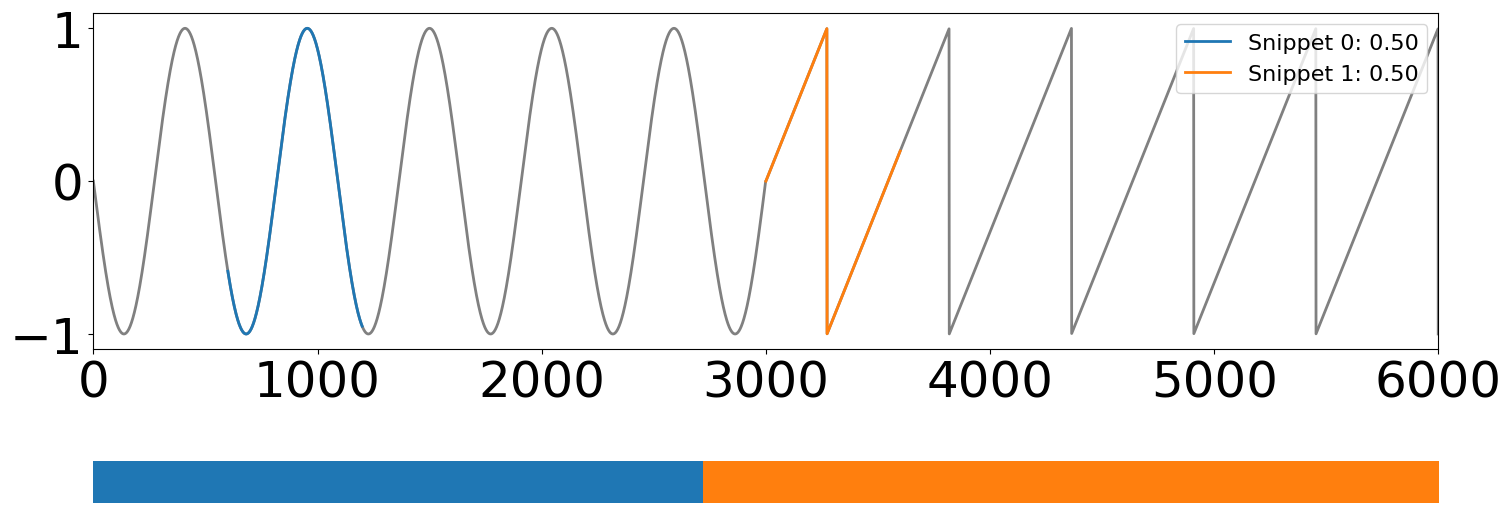

<Axes: >

In [78]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «X» (угол крена) на временном интервале от 950 сек. до 109 сек.** из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из модуля snippets.py.

In [79]:
import pandas as pd

ts_url = './datasets/PAMAP/PAMAP.txt'

df = pd.read_csv(ts_url, sep=' ', header=None).T
start_time = 850
end_time = 900

ts = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 10].to_numpy()
snp = snippets(ts, 500, 2)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

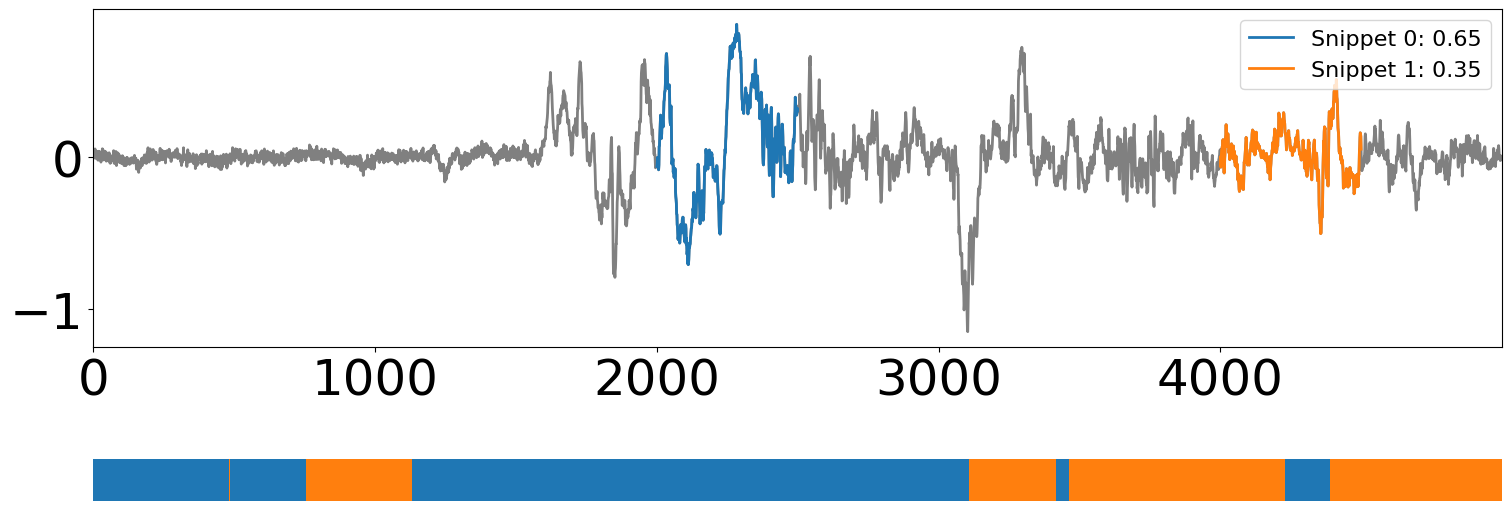

<Axes: >

In [80]:
plot_snippets(ts, snp)

Оцените точность разметки, полученной при помощи сниппетов.

In [81]:
from sklearn.metrics import accuracy_score
pred_labels = np.zeros_like(ts)
for i, snippet in enumerate(snp):
    neighbours = np.array(snippet['neighbors'])
    for neighbour_index in neighbours:
        pred_labels[neighbour_index] = i

labels = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 1].to_numpy()
print(np.unique(labels))
labels = np.where(labels==3, 1, labels)
labels = np.where(labels==17, 0, labels)

print(accuracy_score(pred_labels, labels))

[ 3. 17.]
0.49149829965993197


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

С помощью сниппетов можно кластеризовывать временные ряды

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1.

In [82]:
import pandas as pd

ts_url = './datasets/PAMAP/PAMAP.txt'

df = pd.read_csv(ts_url, sep=' ', header=None).T
start_time = 850
end_time = 900

ts = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 10:13].to_numpy()
snp = np.array([snippets(ts[:, i], 500, 2) for i in range(0, 3)])


In [83]:
snp[0]

array([{'index': 2000, 'snippet': array([-6.22735e-02, -4.65563e-02, -2.10669e-03, -2.54615e-02,
              -1.33512e-02, -1.89558e-02, -8.33800e-02, -5.11423e-02,
               7.17531e-02,  7.40273e-02,  1.29048e-01,  1.76944e-01,
               2.27898e-01,  2.76548e-01,  2.35385e-01,  1.72768e-01,
               1.23571e-01,  1.55238e-01,  2.36283e-01,  2.12042e-01,
               2.52519e-01,  2.19720e-01,  1.98950e-01,  2.45539e-01,
               3.07209e-01,  3.66107e-01,  3.76376e-01,  4.14461e-01,
               4.33823e-01,  4.36275e-01,  4.81384e-01,  5.92844e-01,
               6.13126e-01,  6.72813e-01,  6.82111e-01,  6.56999e-01,
               6.10329e-01,  5.74583e-01,  4.81057e-01,  4.70921e-01,
               4.50259e-01,  4.73327e-01,  4.68888e-01,  4.63092e-01,
               4.75817e-01,  4.06307e-01,  2.60105e-01,  2.28144e-01,
               2.12446e-01,  3.05818e-01,  3.37046e-01,  2.55018e-01,
               7.42364e-02, -4.49920e-02, -2.83311e-02, -1.6170

Оцените точность разметки, полученной при помощи сниппетов.

In [84]:
def get_label(labels_3d):
    labels = [0 for _ in range(len(labels_3d))]
    for i in range(len(labels)):
        counter = {}
        for label in labels_3d[i]:
            if label in counter:
                counter[label] += 1
            else:
                counter[label] = 1
        labels[i] = max(counter, key=counter.get)
    return labels
        

In [85]:
labels = np.zeros_like(ts)
for i, snip_1d in enumerate(snp):
    for j, snippet in enumerate(snip_1d):
        neighbours = snippet['neighbors']
        for neighbour in neighbours:
            labels[neighbour][i] = j

labels_1d = get_label(labels)
true_labels = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 1].to_numpy()
true_labels = np.where(true_labels==3, 1, true_labels)
true_labels = np.where(true_labels==17, 0, true_labels)

accuracy_score(labels_1d, true_labels)

0.5607121424284857

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

При использовании трёх осей может быть получена более высокая точность классификации.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [86]:
# INSERT YOUR CODE

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [87]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?